## Practicing Intro to Data Visualization with Matplotlib

## Practicing on August 31, 2025

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Load Netflix Dataset
netflix_df = pd.read_csv('/Users/auroraxiao/Desktop/Data Science Project/DS-Projects/Data Set/netflix_data.csv')

Plot the number of movies released each year

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [6]:
netflix_release_year = netflix_df[netflix_df['type'] == "Movie"].groupby('release_year').agg('count')['show_id'].reset_index()

In [8]:
netflix_release_year = netflix_release_year.rename(columns={"show_id": "movie_count"})

In [9]:
netflix_release_year

,release_year,movie_count
0,1942,1
1,1944,1
2,1945,1
3,1946,1
4,1947,1
...,...,...
66,2017,628
67,2018,607
68,2019,464
69,2020,345


### Line Graph

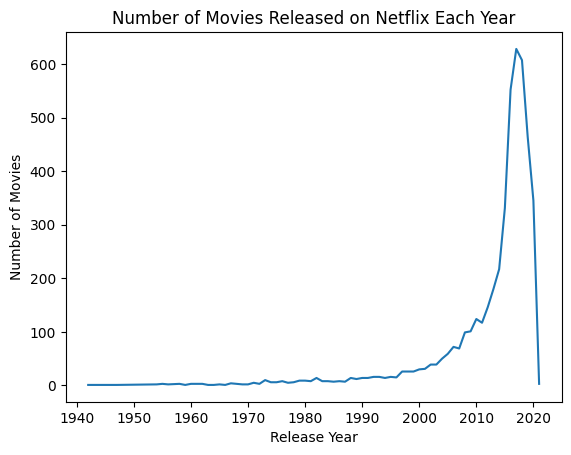

In [12]:
fig, ax = plt.subplots()
ax.plot(netflix_release_year[["release_year"]], netflix_release_year[["movie_count"]])
ax.set_title("Number of Movies Released on Netflix Each Year")
ax.set_xlabel("Release Year")
ax.set_ylabel("Number of Movies")
plt.show()

### Bar Graph

Plot a bar chart showing the top 5 countries with the most Netflix titles.

In [15]:
netflix_movie_by_country = netflix_df[netflix_df['type'] == "Movie"].groupby('country').agg('count')['show_id'].reset_index()

In [16]:
netflix_movie_by_country = netflix_movie_by_country.rename(columns={"show_id": "movie_count"})

In [17]:
netflix_movie_by_country.sort_values(by = "movie_count", ascending = False).head(5)

,country,movie_count
67,United States,1856
25,India,858
66,United Kingdom,289
8,Canada,151
17,France,129


In [25]:
netflix_movie_most_country_5 = netflix_movie_by_country.sort_values(by = "movie_count", ascending = False).head(5)

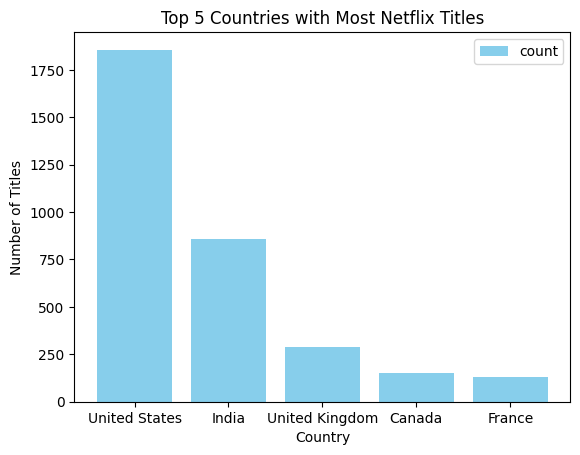

In [27]:
fig, ax = plt.subplots()
ax.bar(netflix_movie_most_country_5["country"], netflix_movie_most_country_5["movie_count"], color='skyblue', label = "count")
ax.set_title("Top 5 Countries with Most Netflix Titles")
ax.set_xlabel("Country")
ax.set_ylabel("Number of Titles")
ax.legend()
plt.show()

### Histograms

Make a histogram of the duration (in minutes) of movies.

Use ax.hist().

Try different bins values to see how the shape changes.

In [29]:
netflix_df[netflix_df['type'] == "Movie"].head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
5,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


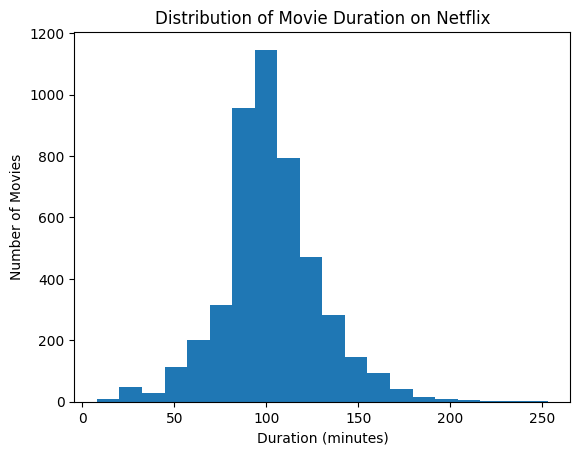

In [31]:
fig, ax = plt.subplots()
ax.hist(netflix_df[netflix_df['type'] == "Movie"]['duration'],bins = 20)
ax.set_title("Distribution of Movie Duration on Netflix")
ax.set_xlabel("Duration (minutes)")
ax.set_ylabel("Number of Movies")
plt.show()

### Subplot

Create a 2x1 subplot:
Top: number of TV shows added by year.
Bottom: number of movies added by year.

In [19]:
netflix_release_year_tv = netflix_df[netflix_df['type'] != "Movie"].groupby('release_year').agg('count')['show_id'].reset_index()

In [20]:
netflix_release_year_tv.head()

,release_year,show_id
0,1990,1
1,2001,1
2,2006,3
3,2010,1
4,2011,2


In [21]:
netflix_release_year_tv.rename(columns = {"show_id": "tv_count"}, inplace = True)

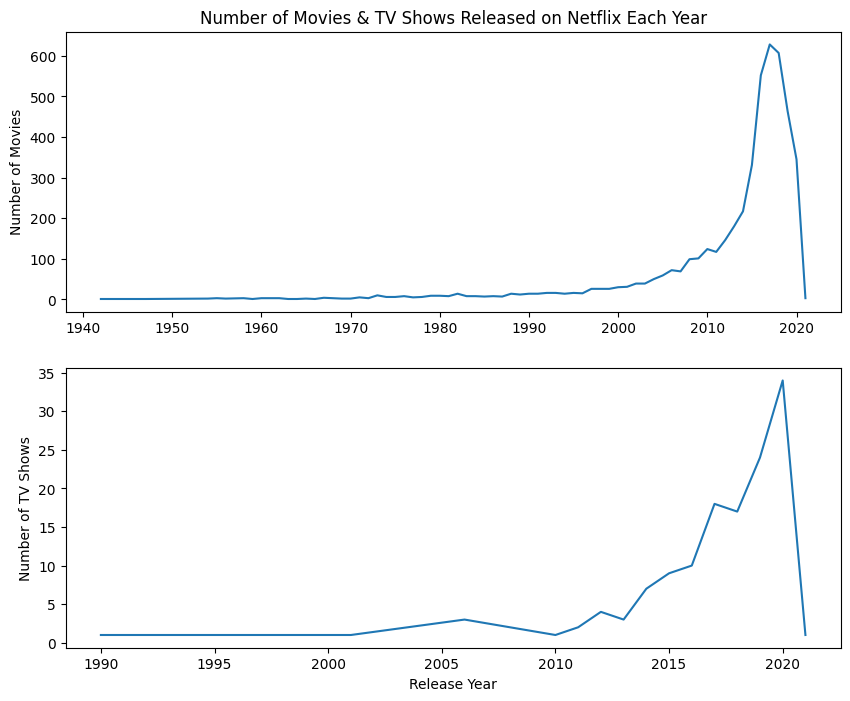

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(netflix_release_year[["release_year"]], netflix_release_year[["movie_count"]])
ax[1].plot(netflix_release_year_tv[["release_year"]], netflix_release_year_tv[["tv_count"]])
ax[0].set_title("Number of Movies & TV Shows Released on Netflix Each Year")
ax[1].set_xlabel("Release Year")
ax[0].set_ylabel("Number of Movies")
ax[1].set_ylabel("Number of TV Shows")
plt.show()